C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


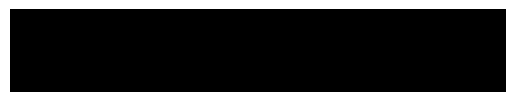

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw

# Load the image
image_path = 'C:/Users/moham/OneDrive/Pictures/Screenshots/ss_real_estate.png'
image = mpimg.imread(image_path)

# Reshape the image array
height, width, channels = image.shape
X = image.reshape((height * width, channels))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)

# Function to create a color palette image
def create_color_palette(dominant_colors, palette_size=(300, 50)):
    # Create an image to display the colors
    palette = Image.new("RGB", palette_size)
    draw = ImageDraw.Draw(palette)

    # Calculate the width of each color swatch
    swatch_width = palette_size[0] // len(dominant_colors)

    # Draw each color as a rectangle on the palette
    for i, color in enumerate(dominant_colors):
        draw.rectangle([i * swatch_width, 0, (i + 1) * swatch_width, palette_size[1]], fill=tuple(color))

    return palette

# Display the color palette
palette_image = create_color_palette(dominant_colors)
plt.imshow(palette_image)
plt.axis('off')
plt.show()
